In [105]:
import pandas as pd                    # Used for data manipulation and analysis.
import numpy as np                     # Used for scientific computing and handling numerical data efficiently.
import matplotlib.pyplot as plt        # A plotting library for creating static, animated, and interactive visualizations in Python.
import seaborn as sns                  # Provides high-level abstractions for complex visualizations
import requests                        # Retrieves the HTML content from the web page
from bs4 import BeautifulSoup          # Parses and extracts specific data from that HTML content.
import openpyxl                        # library used for reading, writing, and manipulating Excel files in the .xlsx and .xlsm formats.

In [106]:

# Creating a dictionary using the given example dataset and add more random data into it.

dictionary = {
    "Customer_ID": [
        "C001", "C002", "C003", "C004", "C005", "C006", "C007", "C008", "C004", "C005",
        "C009", "C010", "C001", "C003", "C001", "C006", "C007", "C007", "C001", "C002"
    ],
    "Product_Category": [
        "Electronics", "Clothing", "Home Appliances", "Books", "Groceries", "Electronics",
        "Clothing", "Furniture", "Electronics", "Sports", "Books", "Home Appliances", "Electronics",
        "Electronics", "Home Appliances", "Electronics", "Electronics", "Travel", "Clothing", "Movies"
    ],
    "Purchase_Amount": [
        250.75, 45.00, 120.00, 15.99, 89.50, 320.10, 60.75, 450.00, 25.00, 75.99,
        100.00, 45.50, 250.00, 199.99, 55.60, 30.25, 40.00, 700.00, 15.00, 25.00
    ],
    "Timestamp": [
        "2024-01-15 14:30:00", "2024-01-15 16:00:00", "2024-01-16 10:15:00", "2024-01-16 12:00:00",
        "2024-01-16 13:45:00", "2024-01-16 14:30:00", "2024-01-16 15:00:00", "2024-01-16 16:30:00",
        "2024-01-16 17:00:00", "2024-01-16 18:30:00", "2024-01-16 19:00:00", "2024-01-16 20:00:00",
        "2024-01-16 21:15:00", "2024-01-16 22:00:00", "2024-01-17 09:00:00", "2024-01-17 10:30:00",
        "2024-01-17 11:15:00", "2024-01-17 12:45:00", "2024-01-17 14:00:00", "2024-01-17 15:30:00"
    ]
}

# Create a DataFrame
df = pd.DataFrame(dictionary)

# Save to CSV
df.to_csv("purchase_data.csv", index=False)
print("")
print("")
print(df)
print("")
print("")

   Customer_ID Product_Category  Purchase_Amount            Timestamp
0         C001      Electronics           250.75  2024-01-15 14:30:00
1         C002         Clothing            45.00  2024-01-15 16:00:00
2         C003  Home Appliances           120.00  2024-01-16 10:15:00
3         C004            Books            15.99  2024-01-16 12:00:00
4         C005        Groceries            89.50  2024-01-16 13:45:00
5         C006      Electronics           320.10  2024-01-16 14:30:00
6         C007         Clothing            60.75  2024-01-16 15:00:00
7         C008        Furniture           450.00  2024-01-16 16:30:00
8         C004      Electronics            25.00  2024-01-16 17:00:00
9         C005           Sports            75.99  2024-01-16 18:30:00
10        C009            Books           100.00  2024-01-16 19:00:00
11        C010  Home Appliances            45.50  2024-01-16 20:00:00
12        C001      Electronics           250.00  2024-01-16 21:15:00
13        C003      

In [107]:

                                                        # Data Loading and Preprocessing

# Load the dataset
data = pd.read_csv("purchase_data.csv")

# Handle missing data
data.fillna({'Purchase_Amount': 0, 'Product_Category': 'Unknown'}, inplace=True)
# '0' will be placed if nothing is purchased, 'unkonwn' will be placed instead of a blank space in product_category.

# Convert 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# format numerical columns properly
data['Purchase_Amount'] = pd.to_numeric(data['Purchase_Amount'], errors='coerce')
# If a value cannot be converted to a numeric type, it is replaced with NaN (Not a Number).
# Without errors='coerce' argument, an invalid value would raise an error.  

print(data)
print("")
print("")

   Customer_ID Product_Category  Purchase_Amount           Timestamp
0         C001      Electronics           250.75 2024-01-15 14:30:00
1         C002         Clothing            45.00 2024-01-15 16:00:00
2         C003  Home Appliances           120.00 2024-01-16 10:15:00
3         C004            Books            15.99 2024-01-16 12:00:00
4         C005        Groceries            89.50 2024-01-16 13:45:00
5         C006      Electronics           320.10 2024-01-16 14:30:00
6         C007         Clothing            60.75 2024-01-16 15:00:00
7         C008        Furniture           450.00 2024-01-16 16:30:00
8         C004      Electronics            25.00 2024-01-16 17:00:00
9         C005           Sports            75.99 2024-01-16 18:30:00
10        C009            Books           100.00 2024-01-16 19:00:00
11        C010  Home Appliances            45.50 2024-01-16 20:00:00
12        C001      Electronics           250.00 2024-01-16 21:15:00
13        C003      Electronics   

In [108]:

                                                        # Exploratory Data Analysis
# Summary statistics
print("Summary statistics:")
print(data.describe())
print("")
print("")


# Total purchases over time
total_purchases = data.groupby(data['Timestamp'].dt.date)['Purchase_Amount'].sum()
# .dt.date: extracts only the date from the Timestamp column, discarding the time.
print("Total purchases over time:")
print(total_purchases)
print("")
print("")


# Most popular product categories
popular_categories = data['Product_Category'].value_counts()
# .value_counts(): counts the occurrences of each unique value in the Customer_ID column.
print("Most popular product categories:")
print(popular_categories)
print("")
print("")


# Average spending per customer
avg_spending = data.groupby('Customer_ID')['Purchase_Amount'].mean()
print("Average spending per customer:")
print(avg_spending)
print("")
print("")


# Most active customer
most_active_customer = data['Customer_ID'].value_counts().idxmax()
# .idxmax(): finds the index of the maximum value in the resulting Series from .value_counts()
print(f"Most Active Customer: {most_active_customer}")
print("")
print("")


Summary statistics:
       Purchase_Amount            Timestamp
count        20.000000                   20
mean        145.721000  2024-01-16 19:57:45
min          15.000000  2024-01-15 14:30:00
25%          37.562500  2024-01-16 14:18:45
50%          68.370000  2024-01-16 18:45:00
75%         212.492500  2024-01-17 09:22:30
max         700.000000  2024-01-17 15:30:00
std         176.060848                  NaN


Total purchases over time:
Timestamp
2024-01-15     295.75
2024-01-16    1752.82
2024-01-17     865.85
Name: Purchase_Amount, dtype: float64


Most popular product categories:
Product_Category
Electronics        7
Clothing           3
Home Appliances    3
Books              2
Groceries          1
Furniture          1
Sports             1
Travel             1
Movies             1
Name: count, dtype: int64


Average spending per customer:
Customer_ID
C001    142.837500
C002     35.000000
C003    159.995000
C004     20.495000
C005     82.745000
C006    175.175000
C007    266.916

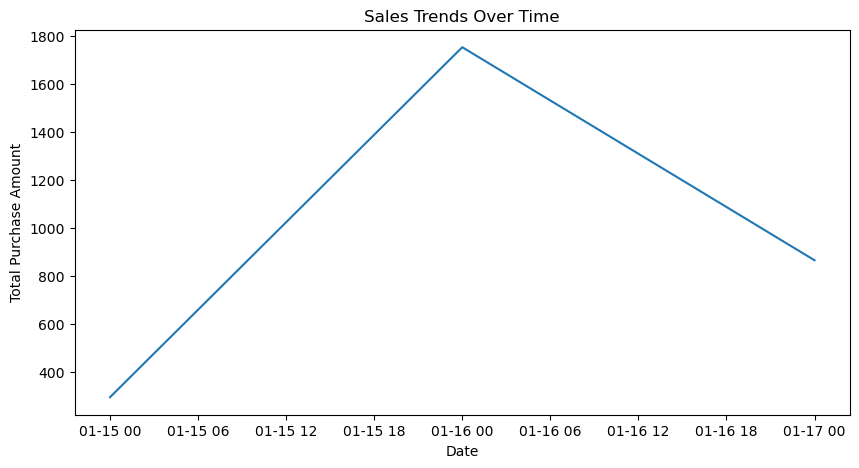

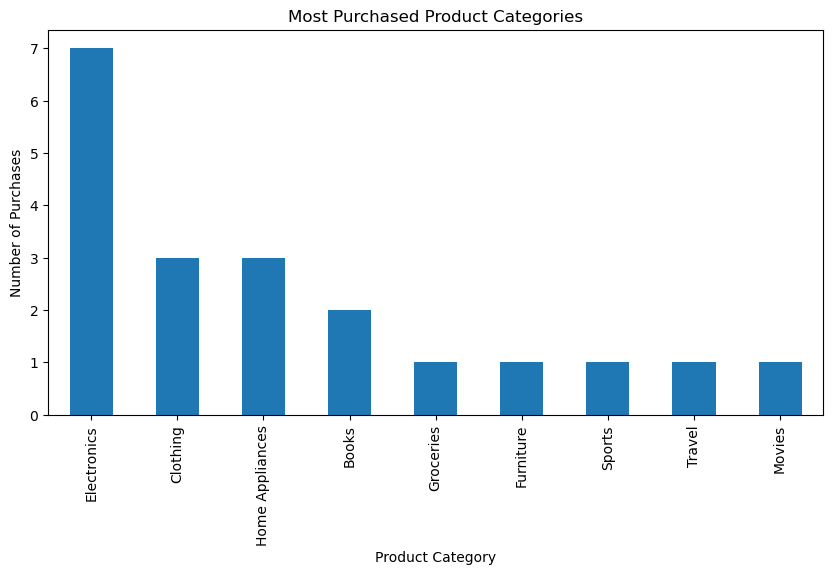

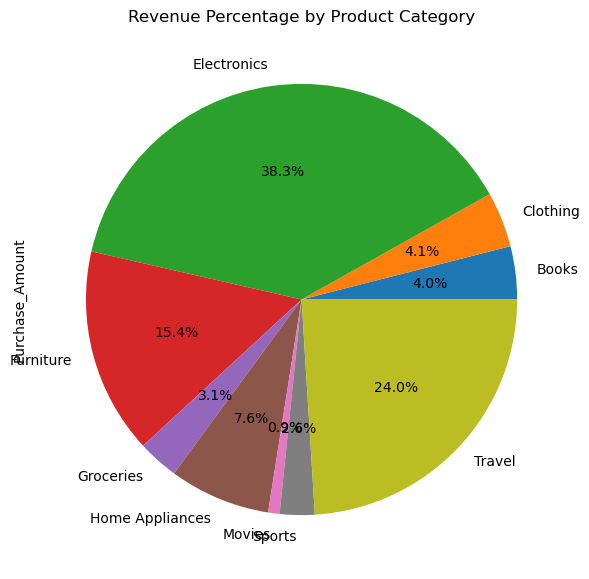

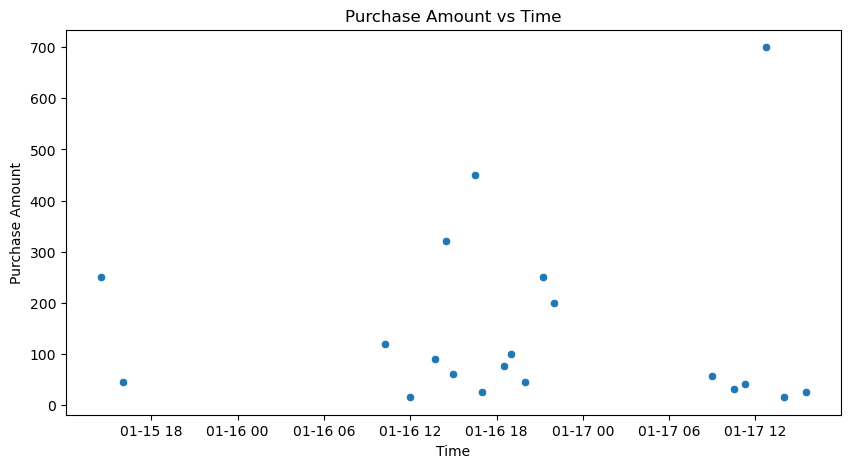

In [109]:

                                                        # Data Visualization


# Line Chart: Sales trends over time
plt.figure(figsize=(10, 5))            # plt.figure(figsize=(10, 5)): Sets the figure size to 10 inches wide and 5 inches tall.
total_purchases.plot(kind='line')      # total_purchases.plot(kind='line'): Creates a line chart from the total_purchases Series.
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Purchase Amount")
plt.show()
print("")


# Bar Chart: Most purchased product categories
plt.figure(figsize=(10, 5))
popular_categories.plot(kind='bar')    # popular_categories.plot(kind='bar'): Creates a bar chart from the popular_categories Series.
plt.title("Most Purchased Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.show()
print("")


# Pie Chart: Revenue percentage by product category
category_revenue = data.groupby('Product_Category')['Purchase_Amount'].sum()
plt.figure(figsize=(7, 7))
category_revenue.plot(kind='pie', autopct='%1.1f%%')    # autopct='%1.1f%%': Displays percentages on the pie chart with 1 decimal place.
plt.title("Revenue Percentage by Product Category")
plt.show()
print("")


# Scatter Plot: Relationship between purchase amount and time
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Timestamp'], y=data['Purchase_Amount'])    # sns.scatterplot(x=data['Timestamp'], y=data['Purchase_Amount']): Creates a scatter plot.
plt.title("Purchase Amount vs Time")
plt.xlabel("Time")
plt.ylabel("Purchase Amount")
plt.show()
print("")


In [110]:

                                                        # Web Scraping

print("")
print("")
print("                    Please wait while the program scrapes the required data from the website.....")
print("                    Being thorough... This might take upto 4 minutes.")
print("")
print("")


# Using request library to make HTTP requests to fetch data from the web.
# Websites like Amazon utilize various methods to prevent bot requests, therefore using headers we can mimic our requests as it came frome a browser.
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})
URL = "https://www.amazon.com/s?i=computers-intl-ship&bbn=16225007011&rh=n%3A16225007011%2Cn%3A1292110011&s=featured-rank&ds=v1%3Ap%2Bcgl4L%2BsS6k2CP0uYuJZxai9WsP5wOhIw%2BNE9zZVFM&qid=1734168416&ref=sr_st_featured-rank"
webpage = requests.get(URL, headers=HEADERS)

# Soup Object containing all data
soup = BeautifulSoup(webpage.content, "html.parser")

# Fetch all the links of products using Anchor tags.
links = soup.find_all("a", attrs={"class":'a-link-normal s-line-clamp-4 s-link-style a-text-normal'})

# Initialize the DataFrame to store the scraped data
df2 = pd.DataFrame(columns=["product_title", "price", "rating", "review_count", "availability"])





                                    # Scraping begins....................

# Since scraping all the search results is time consuming, and the project only required at least 50 items, decided to only scrape 50 items.
while True:
    # Scrape the current page
    links = soup.find_all("a", attrs={"class": 'a-link-normal s-line-clamp-4 s-link-style a-text-normal'})

    # Iterate through all the links and scrape data
    for link in links:
        # Construct the full product URL
        product_url = "https://amazon.com" + link.get('href')

        try:
            # Get the content of the product page
            product_page = requests.get(product_url, headers=HEADERS)
            product_soup = BeautifulSoup(product_page.content, "html.parser")

            # Extract product details
            product_title = product_soup.find("span", attrs={"id": 'productTitle'}).text.strip()

            # Handle cases where price might not be available
            price_tag = product_soup.find("span", attrs={"class": 'a-offscreen'})
            price = price_tag.text.strip().replace('$', '') if price_tag else None
            # if price_tag else None: Handles cases where the price_tag is not found. In such cases, price is set to None instead of causing an error.

            # Handle cases where rating might not be available
            rating_tag = product_soup.find("span", attrs={"class": 'a-icon-alt'})
            rating = rating_tag.text if rating_tag else None
            # if rating_tag else None: Handles cases where the rating_tag is not found. In such cases, rating is set to None.

            # Handle cases where review_count might not be available
            review_count_tag = product_soup.find("span", attrs={"id": "acrCustomerReviewText"})
            review_count = review_count_tag.text.strip() if review_count_tag else None

            # Handle cases where availability might not be available
            availability_tag = product_soup.find("span", attrs={"class": "a-size-medium a-color-success"})
            availability = availability_tag.text.strip() if availability_tag else None

            # Add the data to the DataFrame
            df2.loc[len(df2)] = [product_title, price, rating, review_count, availability]

            # Stop if the program reached 50 products
            if len(df2) >= 50:
                break

        except Exception as e:
            print(f"Error scraping {product_url}: {e}")
            # Logs the URL of the product where the error occurred and the specific error message (e) for debugging purposes.

    if len(df2) >= 50:
        break

    # Amazon website uses a "Next" button for pagination.
    # Therefore, scrape items until the next button is found and, then use that link to get to the next page.
    # Find the "Next" button
    next_button = soup.find('a', {'class': 's-pagination-item s-pagination-next s-pagination-button s-pagination-button-accessibility s-pagination-separator'})
    if next_button and 'href' in next_button.attrs:
        URL = "https://www.amazon.com" + next_button['href']
        webpage = requests.get(URL, headers=HEADERS)
        soup = BeautifulSoup(webpage.content, "html.parser")
    else:
        break  # Exit the loop when no "Next" button is found

# Save the results to a CSV file
df2.to_csv("amazon_products.csv", index=False)

# Display the scraped data that was integrated into the dataframe.
print(df2)
print("")
print("")




                    Please wait while the program scrapes the required data from the website.....
                    Being thorough... This might take upto 4 minutes.


                                        product_title   price  \
0   iDiskk App-le Certified 2TB Portable External ...  123.99   
1   iDiskk 2TB App-le Certified External Hard Driv...  123.99   
2   ThePhotoStick® Omni 128GB - Secure Photo & Vid...   79.99   
3   Seagate Portable 2TB External Hard Drive HDD —...   69.99   
4   SAMSUNG 990 PRO SSD NVMe M.2 PCIe Gen4, M.2 22...  169.49   
5   SanDisk 2TB Extreme Portable SSD - Up to 1050M...  139.08   
6   ThePhotoStick® Omni 128GB - Secure Photo & Vid...   79.99   
7   SAMSUNG 990 EVO SSD 2TB, PCIe Gen 4x4, Gen 5x2...  129.99   
8   Western Digital WD_BLACK 1TB SN770 NVMe Intern...   69.99   
9   WD_BLACK 2TB SN850P NVMe M.2 SSD Officially Li...  179.99   
10  Crucial BX500 1TB 3D NAND SATA 2.5-Inch Intern...   57.90   
11  UnionSine 1TB Ultra Slim Portable External H

In [111]:

       # Integrate the scraped data into the existing dataset by creating a new dataframe with column names of both original dataframes.

# Combine column names from both DataFrames
combined_columns = list(set(df.columns).union(set(df2.columns)))  # Convert set to list

# Create an empty DataFrame with combined columns
combined_df = pd.DataFrame(columns=combined_columns)

# Add rows from df to the combined DataFrame
for _, row in df.iterrows():
    combined_row = {col: row[col] if col in df.columns else "Unknown" for col in combined_columns}
    # Convert the row to a DataFrame
    combined_row_df = pd.DataFrame([combined_row])
    combined_df = pd.concat([combined_df, combined_row_df], ignore_index=True)

# Add rows from df2 to the combined DataFrame
for _, row in df2.iterrows():
    combined_row = {col: row[col] if col in df2.columns else "Unknown" for col in combined_columns}
    # Convert the row to a DataFrame
    combined_row_df = pd.DataFrame([combined_row])
    combined_df = pd.concat([combined_df, combined_row_df], ignore_index=True)

# Convert 'Timestamp' column in combined_df to datetime
combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'], errors='coerce')

# Convert 'Purchase_Amount' column in combined_df to numeric
combined_df['Purchase_Amount'] = pd.to_numeric(combined_df['Purchase_Amount'], errors='coerce')

# Display the combined DataFrame
print(combined_df)
print("")
print("")

   availability              rating Customer_ID  \
0       Unknown             Unknown        C001   
1       Unknown             Unknown        C002   
2       Unknown             Unknown        C003   
3       Unknown             Unknown        C004   
4       Unknown             Unknown        C005   
..          ...                 ...         ...   
65         None  4.5 out of 5 stars     Unknown   
66     In Stock  4.3 out of 5 stars     Unknown   
67     In Stock  4.5 out of 5 stars     Unknown   
68     In Stock  4.4 out of 5 stars     Unknown   
69     In Stock  4.9 out of 5 stars     Unknown   

                                        product_title Product_Category  \
0                                             Unknown      Electronics   
1                                             Unknown         Clothing   
2                                             Unknown  Home Appliances   
3                                             Unknown            Books   
4                

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18488\4173360690.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, combined_row_df], ignore_index=True)


In [112]:

                                                        # Custom Analytics Features


# 1. Search purchases by a specific customer
def search_purchases_by_customer(customer_id):
    return combined_df[combined_df['Customer_ID'] == customer_id]


# 2. Filter purchases by date range or amount
def filter_purchases(start_date=None, end_date=None, min_amount=None):
    filtered_df = combined_df.copy()
    if start_date:
        filtered_df = filtered_df[filtered_df['Timestamp'] >= pd.to_datetime(start_date)]
    if end_date:
        filtered_df = filtered_df[filtered_df['Timestamp'] <= pd.to_datetime(end_date)]
    if min_amount:
        filtered_df = filtered_df[filtered_df['Purchase_Amount'] >= min_amount]
    return filtered_df


# 3. Calculate total revenue by product category
def calculate_revenue_by_category():
    return combined_df.groupby('Product_Category')['Purchase_Amount'].sum()


# 4. Summary report of top-performing products
def summary_report():
    top_products = combined_df.groupby('Product_Category')['Purchase_Amount'].sum().sort_values(ascending=False)
    return top_products


# 5. Export data to Excel (Bonus Challenge)
def export_to_excel(dataframe, filename):
    dataframe.to_excel(filename, index=False)
    print(f"Exported to {filename}")

In [113]:

                                                        # Usage examples

# Search purchases by customer 'C001'
customer_purchases = search_purchases_by_customer('C001')
print("Purchases by C001:")
print(customer_purchases)
print("")
print("")


# Filter purchases from 2024-01-16 with a minimum amount of 100
filtered_data = filter_purchases(start_date='2024-01-16', min_amount=100)
print("Filtered by date:")
print(filtered_data)
print("")
print("")


# Calculate revenue by category
revenue_by_category = calculate_revenue_by_category()
print("Revenue by category:")
print(revenue_by_category)
print("")
print("")


# Generate a summary report
report = summary_report()
print("Summary Report:")
print(report)
print("")
print("")


# Export filtered data to Excel (Bonus Challenge)
export_to_excel(filtered_data, "filtered_data.xlsx")



Purchases by C001:
   availability   rating Customer_ID product_title Product_Category    price  \
0       Unknown  Unknown        C001       Unknown      Electronics  Unknown   
12      Unknown  Unknown        C001       Unknown      Electronics  Unknown   
14      Unknown  Unknown        C001       Unknown  Home Appliances  Unknown   
18      Unknown  Unknown        C001       Unknown         Clothing  Unknown   

   review_count  Purchase_Amount           Timestamp  
0       Unknown           250.75 2024-01-15 14:30:00  
12      Unknown           250.00 2024-01-16 21:15:00  
14      Unknown            55.60 2024-01-17 09:00:00  
18      Unknown            15.00 2024-01-17 14:00:00  


Filtered by date:
   availability   rating Customer_ID product_title Product_Category    price  \
2       Unknown  Unknown        C003       Unknown  Home Appliances  Unknown   
5       Unknown  Unknown        C006       Unknown      Electronics  Unknown   
7       Unknown  Unknown        C008       Un